# butcher3

The Markov Butcher Shop sells premium grade A+ beef. Customers arrive at the butcher shop and form a single queue. There is one butcher who serves customers from the queue on a first-come-first-served basis.

Based on historical data, the interarrival time between customers is uniformly distributed between 1.5 and 3.5 minutes. The time for a butcher to fill a single order is uniformly distributed between 2.5 and 6.5 minutes. The interarrival times and service times are assumed to be independent.

Simulate the shop for 2 hours, assuming there are $x$ identical butchers, where $x = 1, 2, 3, 4$. In each case,

* determine the average time a customer spends in the queue,
* determine the time average number of customers in the queue,
* plot the number of customers in the queue as a function of time,
* determine the time average number of busy butchers.

How many butchers would you recommend for the shop?

#### Model

Below is the simulation model from the **butcher2** homework problem, with a few modifications:

* Plotting functionality has been added in the setup code.
* The parameter `P.nServers` is initialized to `None`, to be changed before running the simulation.
* The print statements from the `Customer` process were removed.
* A monitor `M.delay` was added, and logic was added to the `Customer` process to observe the time a customer spends in the queue.
* The resource `R.server` is now monitored. 

In [1]:
##### Setup #####
# Import everything from SimPy
from SimPy.Simulation import *

# Import seed initializer and random sampling functions from NumPy
from numpy.random import seed, uniform

# Import step plotting from Matplotlib
from matplotlib.pyplot import step

# Run Matplotlib magic to show plots directly in the notebook
%matplotlib inline

# Make Matplotlib plots display as SVG files, which are cleaner
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')


##### Parameters #####
class P:
    # Customers arrive at the entrance with uniformly distributed
    # interarrival times between 1.5 and 3.5 minutes
    interarrivalTimeMin = 1.5
    interarrivalTimeMax = 3.5
    
    # Service times are uniformly distributed between 2.5 and 6.5 minutes
    serviceTimeMin = 2.5
    serviceTimeMax = 6.5
    
    # Number of servers
    nServers = None
    
    # Shop is open for 2 continuous hours
    simulationTimeMax =  2 * 60
    

##### Processes #####
# Customer
class Customer(Process):
    def behavior(self):
        # Customer arrives, joins queue
        arrivalTime = now()
        yield request, self, R.server
        
        # Customer is released from queue and starts service
        delay = now() - arrivalTime
        M.delay.observe(delay)
        serviceTime = uniform(low = P.serviceTimeMin, high = P.serviceTimeMax)
        yield hold, self, serviceTime
        
        # Customer finishes service, leaves
        yield release, self, R.server

# Entrance
class Entrance(Process):
    def behavior(self):
        # At the start of the simulation, no customers have arrived
        nCustomers = 0
        
        # Customer arrivals
        while True:
            # Wait until the next arrival
            interarrivalTime = uniform(low = P.interarrivalTimeMin, high = P.interarrivalTimeMax)
            yield hold, self, interarrivalTime
            
            # Create a new customer using the template defined in the Customer class
            c = Customer(name="Customer {0}".format(nCustomers))
            
            # Activate the customer's behavior
            activate(c, c.behavior())

            # Count this new customer
            nCustomers += 1

##### Resources #####
class R:
    # Server
    server = None
    

##### Monitors #####
class M:
    # Queue waiting time
    delay = None
    

##### Model #####
def model():
    # Initialize SimPy 
    initialize()

    # Initialize a seed for the random number generator (more on this later in the semester)
    seed(123)

    # Create the server resource
    R.server = Resource(capacity = P.nServers, monitored = True)
    
    # Create the queue waiting time monitor
    M.delay = Monitor()

    # Activate the entrance (to generate customers)
    e = Entrance()
    activate(e, e.behavior())
    
    # Run the simulation
    simulate(until = P.simulationTimeMax)

#### 1 butcher

Let's start with the case of 1 butcher.

Average delay = 24.958199390147065
Time average number of customers in queue = 10.212132079988924
Time average number of busy butchers = 0.9758921802400357


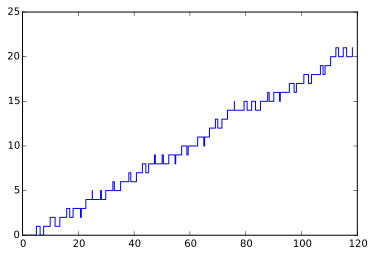

In [2]:
# Set number of butchers
P.nServers = 1

# Run simulation
model()

# Average delay (time in queue)
print("Average delay = {0}".format(M.delay.mean()))

# Time average number of customers in queue
print("Time average number of customers in queue = {0}".format(R.server.waitMon.timeAverage()))

# Number of customers in queue as a function of time
step(R.server.waitMon.tseries(), R.server.waitMon.yseries(), where = "post")

# Time average number of busy butchers
print("Time average number of busy butchers = {0}".format(R.server.actMon.timeAverage()))

#### 2 butchers

Average delay = 0.2566901698568173
Time average number of customers in queue = 0.10053698319392011
Time average number of busy butchers = 1.7156770894448279


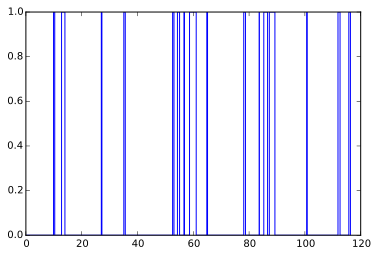

In [3]:
# Set number of butchers
P.nServers = 2

# Run simulation
model()

# Average delay (time in queue)
print("Average delay = {0}".format(M.delay.mean()))

# Time average number of customers in queue
print("Time average number of customers in queue = {0}".format(R.server.waitMon.timeAverage()))

# Number of customers in queue as a function of time
step(R.server.waitMon.tseries(), R.server.waitMon.yseries(), where = "post")

# Time average number of busy butchers
print("Time average number of busy butchers = {0}".format(R.server.actMon.timeAverage()))

#### 3 butchers

Average delay = 0.0
Time average number of customers in queue = 0.0
Time average number of busy butchers = 1.7177324654777995


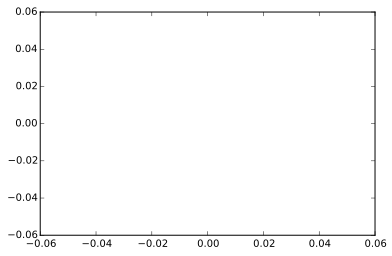

In [4]:
# Set number of butchers
P.nServers = 3

# Run simulation
model()

# Average delay (time in queue)
print("Average delay = {0}".format(M.delay.mean()))

# Time average number of customers in queue
print("Time average number of customers in queue = {0}".format(R.server.waitMon.timeAverage()))

# Number of customers in queue as a function of time
step(R.server.waitMon.tseries(), R.server.waitMon.yseries(), where = "post")

# Time average number of busy butchers
print("Time average number of busy butchers = {0}".format(R.server.actMon.timeAverage()))

#### 4 butchers

Average delay = 0.0
Time average number of customers in queue = 0.0
Time average number of busy butchers = 1.7177324654777995


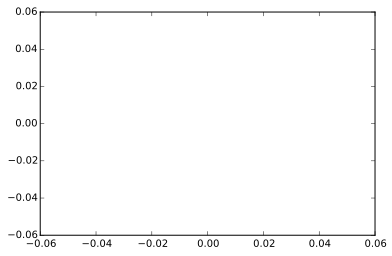

In [5]:
# Set number of butchers
P.nServers = 4

# Run simulation
model()

# Average delay (time in queue)
print("Average delay = {0}".format(M.delay.mean()))

# Time average number of customers in queue
print("Time average number of customers in queue = {0}".format(R.server.waitMon.timeAverage()))

# Number of customers in queue as a function of time
step(R.server.waitMon.tseries(), R.server.waitMon.yseries(), where = "post")

# Time average number of busy butchers
print("Time average number of busy butchers = {0}".format(R.server.actMon.timeAverage()))

#### Recommendation

All of the performance measures (average delay, time average number of customers in queue, time average number of busy butchers) improve dramatically when we increase the number of butchers from 1 to 2. Increasing the number of butchers beyond 2, however, only results in a marginal or even no improvement in the performance measures.

Based on the simulations done here, 2 to 3 butchers are recommended.